In [1]:
import os
import math
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")
import gc

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

In [2]:
all_backup_csv_path = '../backup_csv/backup_all_song_features_csv.csv'
bangladesh_backup_csv_path = '../backup_csv/backup_bangladesh_song_features_csv.csv'
kolkata_backup_csv_path = '../backup_csv/backup_kolkata_song_features_csv.csv'

In [3]:
scaled_all_backup_csv_path = '../backup_csv/scaled_backup_all_song_features_csv.csv'
scaled_bangladesh_backup_csv_path = '../backup_csv/scaled_backup_bangladesh_song_features_csv.csv'
scaled_kolkata_backup_csv_path = '../backup_csv/scaled_backup_kolkata_song_features_csv.csv'

In [4]:
bd = pd.read_csv(scaled_bangladesh_backup_csv_path)

In [5]:
# bd.head(5).T

In [6]:
bd.describe([.1,.25,.5,.75,.9,.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,73.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Popularity,73.0,0.611457,0.191397,0.227273,0.363636,0.454545,0.568182,0.750000,0.840909,0.983636,1.000000
Time Signature,73.0,0.383562,0.212795,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Duration MS,73.0,0.181020,0.127033,0.007364,0.069878,0.097332,0.169448,0.229656,0.287305,0.518556,1.000000
Tempo,73.0,0.464196,0.222622,0.000000,0.142703,0.339574,0.487379,0.594218,0.713006,0.913848,1.000000
Valence,73.0,0.401122,0.202748,0.018582,0.146564,0.263332,0.363386,0.508521,0.703793,0.855921,0.881253
Liveness,73.0,0.189092,0.170458,0.007115,0.042239,0.085735,0.116566,0.275465,0.352069,0.804482,1.000000
Instrumentalness,73.0,0.026195,0.126443,0.000000,0.000000,0.000000,0.000043,0.000416,0.011348,0.513220,1.000000
Acousticness,73.0,0.265454,0.305883,0.000000,0.000835,0.017585,0.102874,0.532918,0.764607,0.901810,0.903291
Speechiness,73.0,0.138796,0.162023,0.000000,0.014593,0.046083,0.075269,0.158986,0.390630,0.685407,0.784946


<AxesSubplot: title={'center': 'Bd Songs : Top vs Bottom'}>

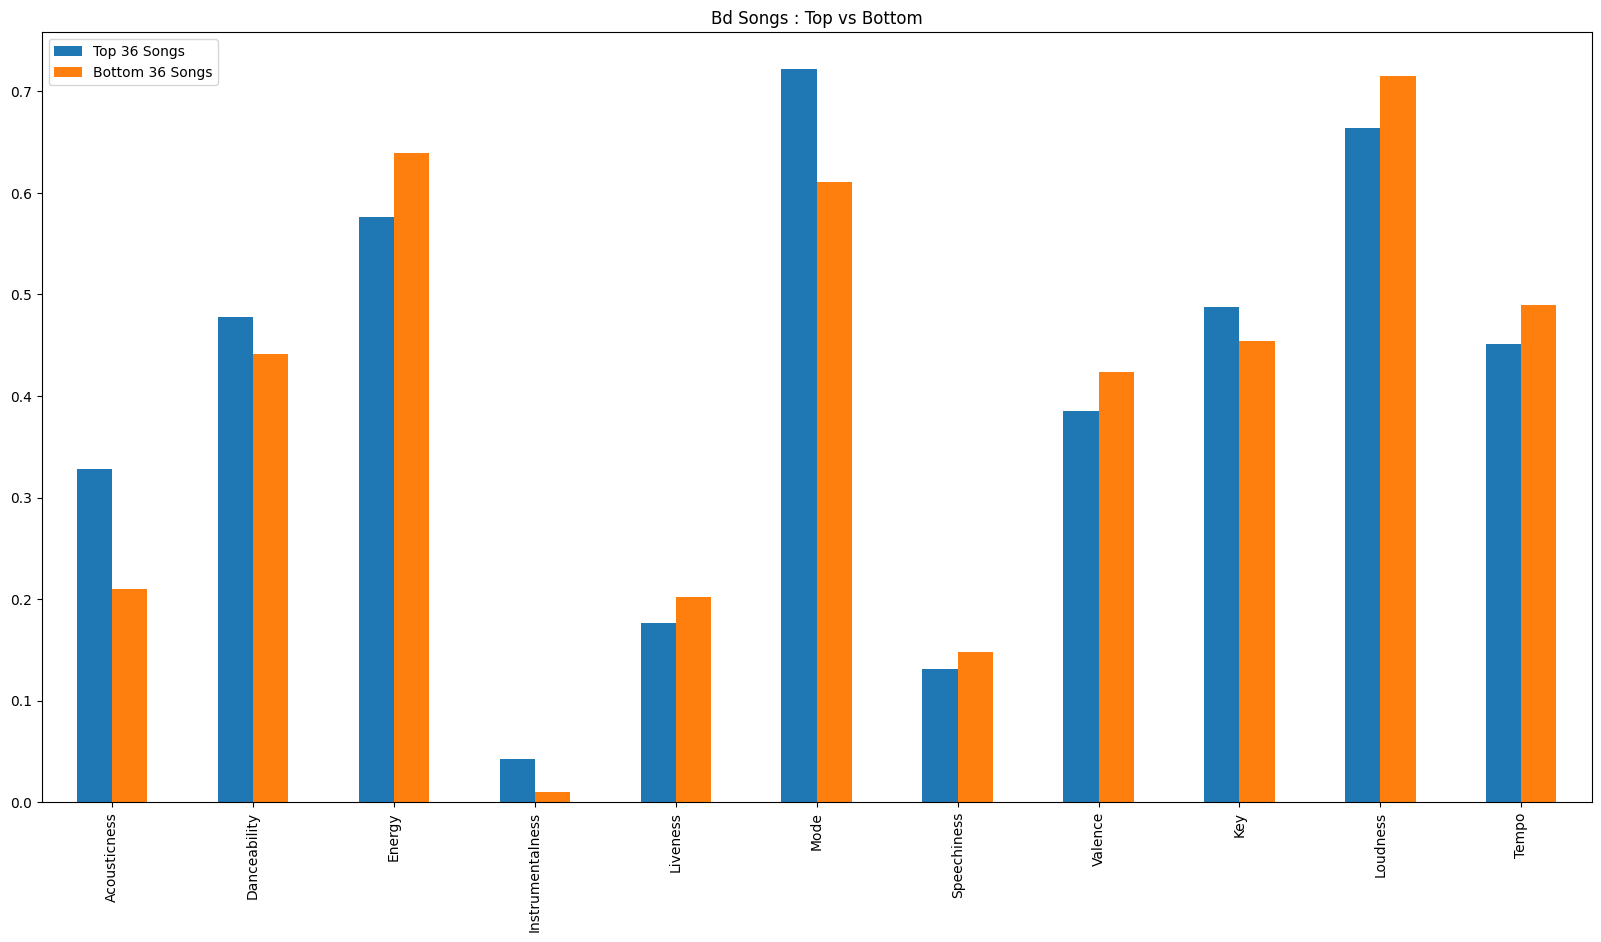

In [7]:
# Top 20
check = bd.sort_values(by = 'Popularity',ascending=False).head(36)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
top_20 = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Top 36 Songs'])

# Bottom 20
check = bd.sort_values(by = 'Popularity',ascending=False).tail(36)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
bottom_20 = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Bottom 36 Songs'])

# top_bottom = pd.concat([top_20,mid_20, bottom_20], axis = 1)
top_bottom = pd.concat([top_20, bottom_20], axis = 1)

top_bottom.plot(title = 'Bd Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

<AxesSubplot: >

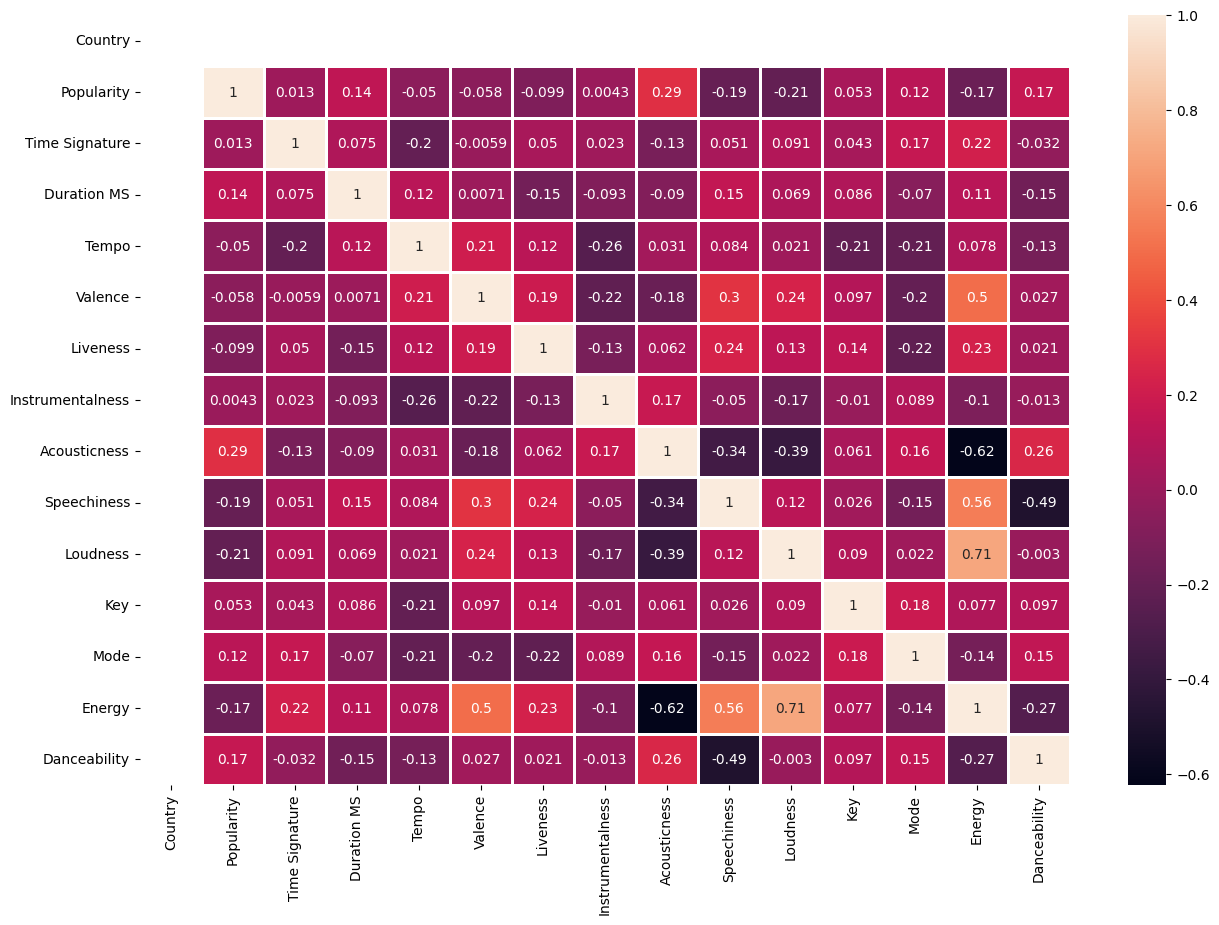

In [8]:
fig, ax = plt.subplots(figsize=(15,10))      
sns.heatmap(bd.corr(), annot=True,linewidths=.9, ax=ax)